# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

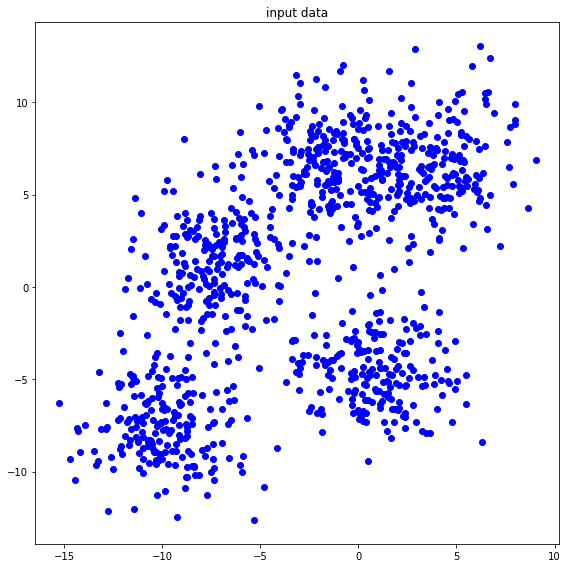

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    distance = np.sum((feature - center)**2, axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [5]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    points = []
    for i in range(feature.shape[0]):
        if label_feature[i] == label: points.append(feature[i])

    if points == []: return None
    points = np.array(points)
    centroid = (np.sum(points, axis=0))/points.shape[0]
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [6]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = np.zeros(distance.shape[0])
    for i in range(len(label_feature)):
        label_feature[i] = np.where(distance[i] == distance[i].min())[0][0]
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return np.int32(label_feature)

## compute loss

In [7]:
def compute_loss(feature, label_feature, centroid):
    
    points = [[] for _ in range(len(centroid))]
    
    for i in range(len(feature)):
        label = label_feature[i]
        points[label].append(feature[i])

    total = 0
    for i in range(len(points)):
        if points[i] == []: continue
        t = np.array(points[i])
        total += np.sum(compute_distance(t, centroid[i]))

    return total/len(feature)

## the number of clusters $K = 2$

In [8]:
number_cluster          = 2
number_iteration        = 10     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [9]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
number_great_iteration = 500
final_loss_02 = np.zeros(number_great_iteration)
minimum_loss = 9999

for h in range(number_great_iteration):

    ### initialize ###
    loss_iteration_02       = np.zeros(number_iteration)
    centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
    label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

    ### iteration ###
    for i in range(number_iteration):
        # 1. compute centroid
        for j in range(number_cluster):
            cent = compute_centroid(feature, label_feature_02, j)
            if cent is not None:
                centroid_iteration_02[i][j][0] = cent[0]
                centroid_iteration_02[i][j][1] = cent[1]
            else:
                centroid_iteration_02[i][j][0] = centroid_iteration_02[i-1][j][0]
                centroid_iteration_02[i][j][1] = centroid_iteration_02[i-1][j][0]

        # 2. compute loss
        loss_iteration_02[i] = compute_loss(feature, label_feature_02, centroid_iteration_02[i])

        # 3. compute distance
        distance = []
        for j in range(number_cluster):
            cent = centroid_iteration_02[i][j]
            distance.append(compute_distance(feature, cent))
        distance = np.vstack(distance).T

        # 4. compute label(re-label)
        label_feature_02 = compute_label(distance)

    ### take minima ###
    if loss_iteration_02[-1] < minimum_loss:
        minimum_loss = loss_iteration_02[-1]
        temp_loss = loss_iteration_02
        temp_centroid = centroid_iteration_02
        temp_label = label_feature_02

loss_iteration_02 = temp_loss
centroid_iteration_02 = temp_centroid
label_feature_02 = temp_label
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [10]:
number_cluster          = 4
number_iteration        = 10     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [11]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
number_great_iteration = 500
final_loss_04 = np.zeros(number_great_iteration)
minimum_loss = 9999

for h in range(number_great_iteration):

    ### initialize ###
    loss_iteration_04       = np.zeros(number_iteration)
    centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
    label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

    ### iteration ###
    for i in range(number_iteration):
        # 1. compute centroid
        for j in range(number_cluster):
            cent = compute_centroid(feature, label_feature_04, j)
            if cent is not None:
                centroid_iteration_04[i][j][0] = cent[0]
                centroid_iteration_04[i][j][1] = cent[1]
            else:
                centroid_iteration_04[i][j][0] = centroid_iteration_04[i-1][j][0]
                centroid_iteration_04[i][j][1] = centroid_iteration_04[i-1][j][0]

        # 2. compute loss
        loss_iteration_04[i] = compute_loss(feature, label_feature_04, centroid_iteration_04[i])

        # 3. compute distance
        distance = []
        for j in range(number_cluster):
            cent = centroid_iteration_04[i][j]
            distance.append(compute_distance(feature, cent))
        distance = np.vstack(distance).T

        # 4. compute label(re-label)
        label_feature_04 = compute_label(distance)

    ### take minima ###
    if loss_iteration_04[-1] < minimum_loss:
        minimum_loss = loss_iteration_04[-1]
        temp_loss = loss_iteration_04
        temp_centroid = centroid_iteration_04
        temp_label = label_feature_04

loss_iteration_04 = temp_loss
centroid_iteration_04 = temp_centroid
label_feature_04 = temp_label
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [12]:
number_cluster          = 8
number_iteration        = 40     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [13]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
number_great_iteration = 2000
final_loss_08 = np.zeros(number_great_iteration)
minimum_loss = 9999

for h in range(number_great_iteration):

    ### initialize ###
    loss_iteration_08       = np.zeros(number_iteration)
    centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
    label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

    ### iteration ###
    for i in range(number_iteration):
        # 1. compute centroid
        for j in range(number_cluster):
            cent = compute_centroid(feature, label_feature_08, j)
            if cent is not None:
                centroid_iteration_08[i][j][0] = cent[0]
                centroid_iteration_08[i][j][1] = cent[1]
            else:
                centroid_iteration_08[i][j][0] = centroid_iteration_08[i-1][j][0]
                centroid_iteration_08[i][j][1] = centroid_iteration_08[i-1][j][0]

        # 2. compute loss
        loss_iteration_08[i] = compute_loss(feature, label_feature_08, centroid_iteration_08[i])

        # 3. compute distance
        distance = []
        for j in range(number_cluster):
            cent = centroid_iteration_08[i][j]
            distance.append(compute_distance(feature, cent))
        distance = np.vstack(distance).T

        # 4. compute label(re-label)
        label_feature_08 = compute_label(distance)

    ### take minima ###
    if loss_iteration_08[-1] < minimum_loss:
        minimum_loss = loss_iteration_08[-1]
        temp_loss = loss_iteration_08
        temp_centroid = centroid_iteration_08
        temp_label = label_feature_08

loss_iteration_08 = temp_loss
centroid_iteration_08 = temp_centroid
label_feature_08 = temp_label
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [14]:
number_cluster          = 16
number_iteration        = 100     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [15]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
number_great_iteration = 2000
final_loss_16 = np.zeros(number_great_iteration)
minimum_loss = 9999

for h in range(number_great_iteration):

    ### initialize ###
    loss_iteration_16       = np.zeros(number_iteration)
    centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
    label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

    ### iteration ###
    for i in range(number_iteration):
        # 1. compute centroid
        for j in range(number_cluster):
            cent = compute_centroid(feature, label_feature_16, j)
            if cent is not None:
                centroid_iteration_16[i][j][0] = cent[0]
                centroid_iteration_16[i][j][1] = cent[1]
            else:
                centroid_iteration_16[i][j][0] = centroid_iteration_16[i-1][j][0]
                centroid_iteration_16[i][j][1] = centroid_iteration_16[i-1][j][0]

        # 2. compute loss
        loss_iteration_16[i] = compute_loss(feature, label_feature_16, centroid_iteration_16[i])

        # 3. compute distance
        distance = []
        for j in range(number_cluster):
            cent = centroid_iteration_16[i][j]
            distance.append(compute_distance(feature, cent))
        distance = np.vstack(distance).T

        # 4. compute label(re-label)
        label_feature_16 = compute_label(distance)

    ### take minima ###
    if loss_iteration_16[-1] < minimum_loss:
        minimum_loss = loss_iteration_16[-1]
        temp_loss = loss_iteration_16
        temp_centroid = centroid_iteration_16
        temp_label = label_feature_16

loss_iteration_16 = temp_loss
centroid_iteration_16 = temp_centroid
label_feature_16 = temp_label
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [16]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [17]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [18]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [19]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [20]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [21]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [22]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [23]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [24]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    initial02 = centroid_iteration_02[0]
    final02 = centroid_iteration_02[-1]

    plt.plot(initial02[:,0], initial02[:,1], 'o', color='blue', label='initial')
    plt.plot(final02[:,0], final02[:,1], 's', color='red', label='final')

    label_process = [centroid_iteration_02[:,i,:] for i in range(2)] 
    for i in range(2):
        name = 'cluster=' + str(i)
        plt.plot(label_process[i][:,0], label_process[i][:,1], '-', label=name)
    
    plt.legend()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    initial04 = centroid_iteration_04[0]
    final04 = centroid_iteration_04[-1]

    plt.plot(initial04[:,0], initial04[:,1], 'o', color='blue', label='initial')
    plt.plot(final04[:,0], final04[:,1], 's', color='red', label='final')

    label_process = [centroid_iteration_04[:,i,:] for i in range(4)] 
    for i in range(4):
        name = 'cluster=' + str(i)
        plt.plot(label_process[i][:,0], label_process[i][:,1], '-', label=name)
    
    plt.legend()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [26]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    initial08 = centroid_iteration_08[0]
    final08 = centroid_iteration_08[-1]

    plt.plot(initial08[:,0], initial08[:,1], 'o', color='blue', label='initial')
    plt.plot(final08[:,0], final08[:,1], 's', color='red', label='final')

    label_process = [centroid_iteration_08[:,i,:] for i in range(8)] 
    for i in range(8):
        name = 'cluster=' + str(i)
        plt.plot(label_process[i][:,0], label_process[i][:,1], '-', label=name)
    
    plt.legend()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    initial16 = centroid_iteration_16[0]
    final16 = centroid_iteration_16[-1]

    plt.plot(initial16[:,0], initial16[:,1], 'o', color='blue', label='initial')
    plt.plot(final16[:,0], final16[:,1], 's', color='red', label='final')

    label_process = [centroid_iteration_16[:,i,:] for i in range(16)] 
    for i in range(16):
        name = 'cluster=' + str(i)
        plt.plot(label_process[i][:,0], label_process[i][:,1], '-', label=name)
    
    plt.legend()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    scat = plt.scatter(x, y, c = label_feature_02, cmap=plt.cm.get_cmap('jet', 2))
    plt.colorbar(scat, label='cluster')
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    scat = plt.scatter(x, y, c = label_feature_04, cmap=plt.cm.get_cmap('jet', 4))
    plt.colorbar(scat, label='cluster')
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    scat = plt.scatter(x, y, c = label_feature_08, cmap=plt.cm.get_cmap('jet', 8))
    plt.colorbar(scat, label='cluster')
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [31]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    scat = plt.scatter(x, y, c = label_feature_16, cmap=plt.cm.get_cmap('jet', 16))
    plt.colorbar(scat, label='cluster')
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1123356206
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.6788419895
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.0198278327
**************************************************
## [RESULT 05]
**************************************************


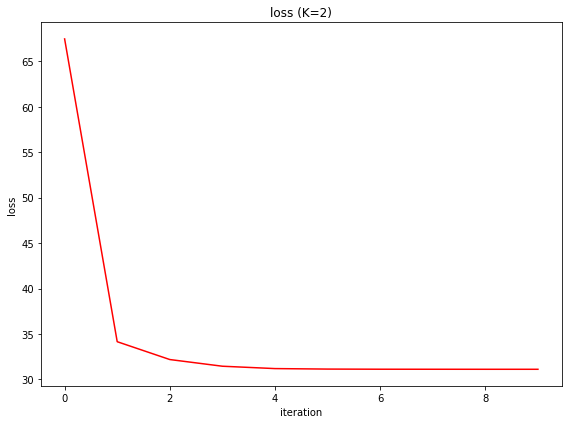

**************************************************
## [RESULT 06]
**************************************************


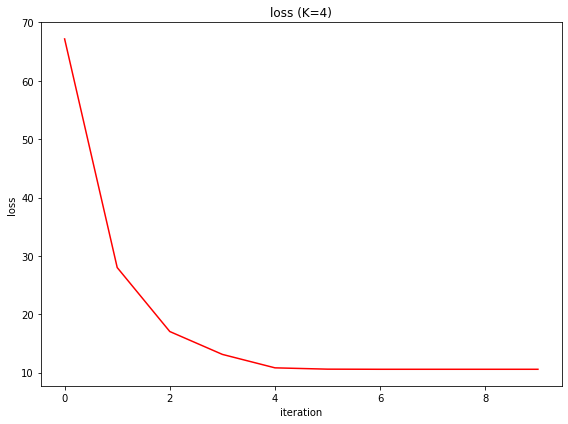

**************************************************
## [RESULT 07]
**************************************************


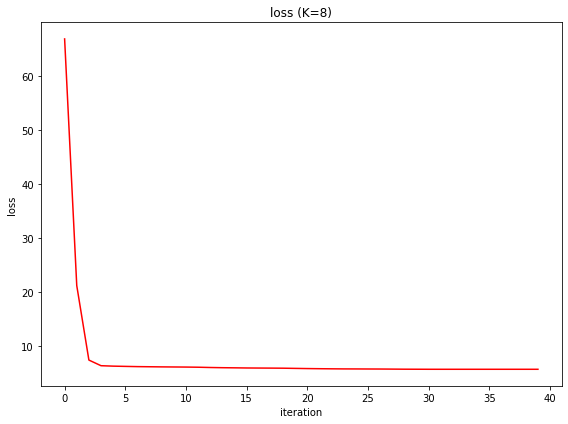

**************************************************
## [RESULT 08]
**************************************************


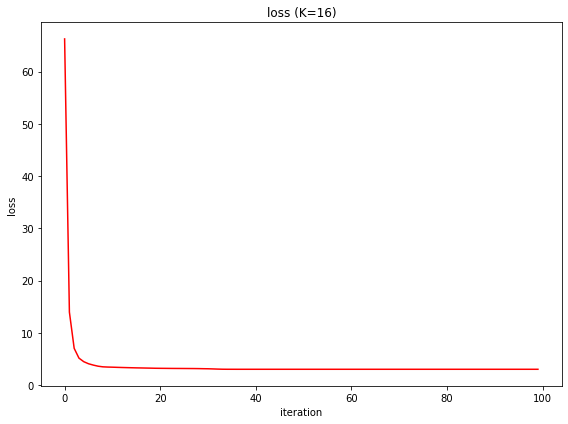

**************************************************
## [RESULT 09]
**************************************************


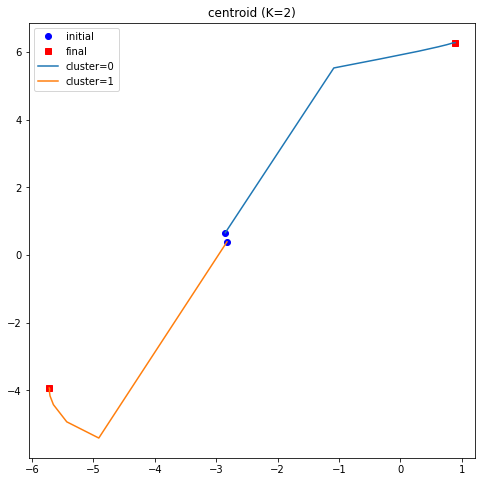

**************************************************
## [RESULT 10]
**************************************************


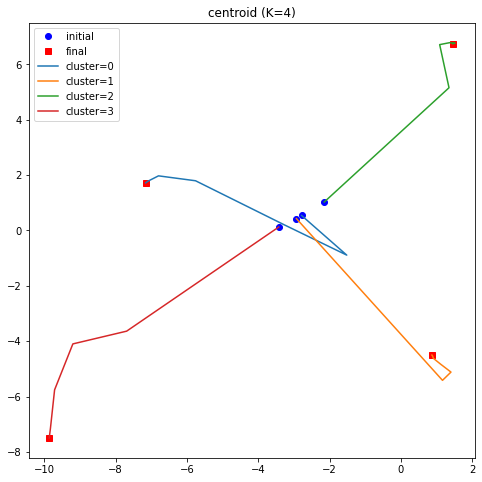

**************************************************
## [RESULT 11]
**************************************************


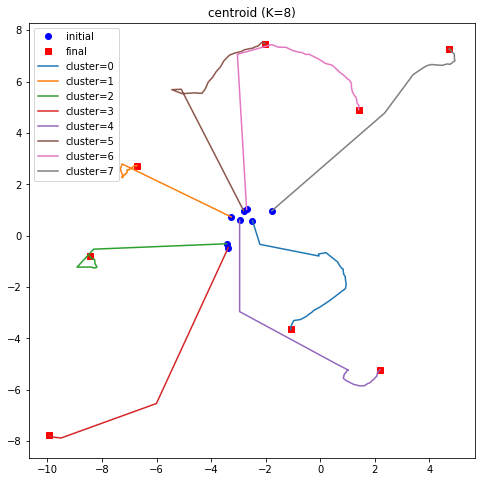

**************************************************
## [RESULT 12]
**************************************************


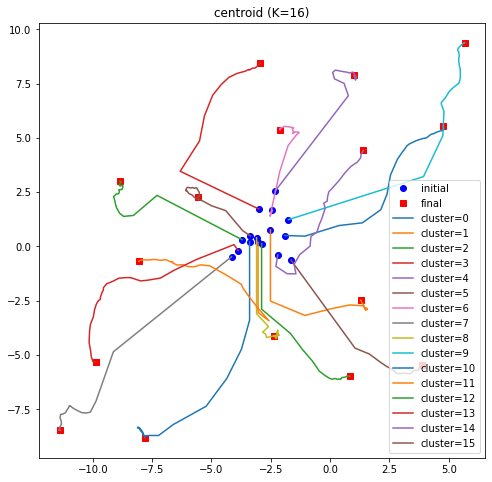

**************************************************
## [RESULT 13]
**************************************************


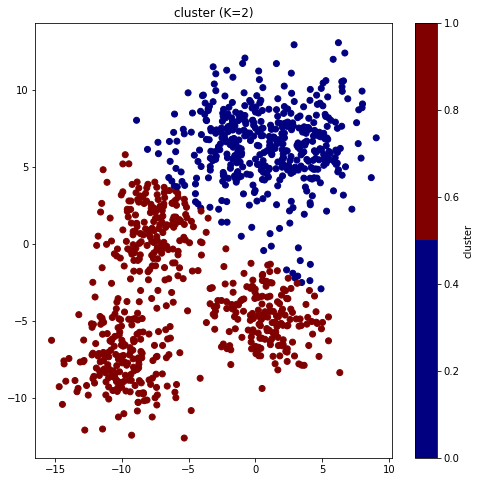

**************************************************
## [RESULT 14]
**************************************************


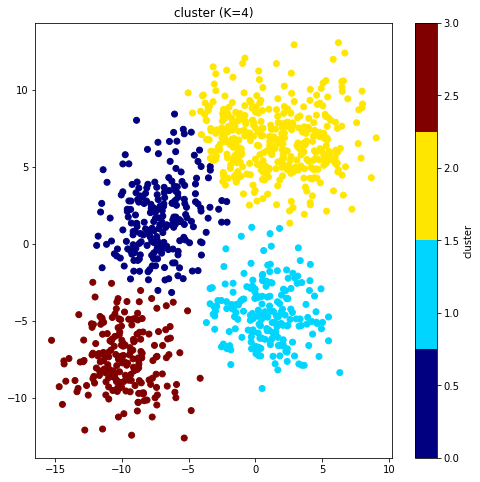

**************************************************
## [RESULT 15]
**************************************************


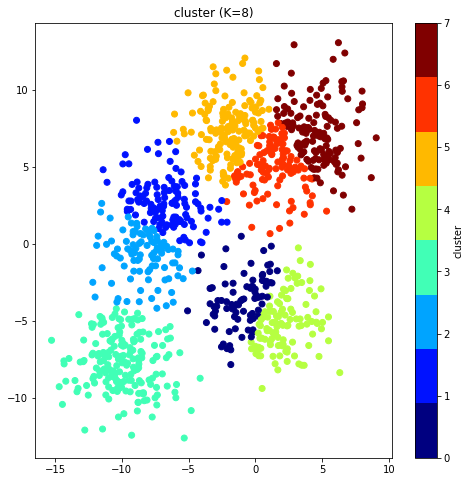

**************************************************
## [RESULT 16]
**************************************************


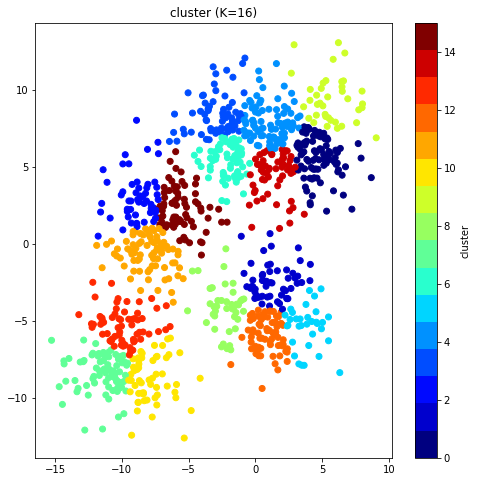

In [32]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)